In [2]:
import os
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns

# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [8, 4]
rcParams['font.size'] = 12
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

#Pandas Options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
cc1 = pd.read_spss('customer_campaigns.sav')
cc1

,CustID,LDate,YearOfBirth,Gender,CallCenter,EDate,NGroup,Region,Class,AIncome,Response
0,0000002771,2015-11-07,1949.0,Others,No,1.379713e+10,D,South West,Platinum,43.0,No
1,0000004529,2015-06-29,1959.0,Male,No,1.379713e+10,F,London,Silver,41.0,No
2,0000011207,2017-05-23,1966.0,Male,No,1.379713e+10,D,London,Silver,45.0,No
3,0000019763,2016-11-19,1946.0,Female,No,1.379713e+10,B,London,Gold,43.0,No
4,0000046906,2017-11-12,1976.0,Female,Yes,1.379713e+10,F,South West,Silver,47.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1839,0052732018,2013-09-01,1979.0,Female,No,1.379713e+10,E,London,Silver,55.0,No
1840,0052745187,2016-12-02,1973.0,Female,No,1.379713e+10,F,London,Gold,36.0,No
1841,0052758092,2016-04-02,1958.0,Female,No,1.379713e+10,A,South East,Silver,43.0,Yes
1842,0052780250,2011-01-29,1980.0,Male,No,1.379713e+10,F,South West,Silver,38.0,No


By using the pyreadstat library we can transform the categorical variables to numerical values as this was an SPSS file

In [4]:
cc, meta = pyreadstat.read_sav('customer_campaigns.sav')
cc


,CustID,LDate,YearOfBirth,Gender,CallCenter,EDate,NGroup,Region,Class,AIncome,Response
0,0000002771,2015-11-07,1949.0,3.0,0.0,1.379713e+10,4.0,2.0,1.0,43.0,0.0
1,0000004529,2015-06-29,1959.0,2.0,0.0,1.379713e+10,6.0,1.0,3.0,41.0,0.0
2,0000011207,2017-05-23,1966.0,2.0,0.0,1.379713e+10,4.0,1.0,3.0,45.0,0.0
3,0000019763,2016-11-19,1946.0,1.0,0.0,1.379713e+10,2.0,1.0,2.0,43.0,0.0
4,0000046906,2017-11-12,1976.0,1.0,1.0,1.379713e+10,6.0,2.0,3.0,47.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1839,0052732018,2013-09-01,1979.0,1.0,0.0,1.379713e+10,5.0,1.0,3.0,55.0,0.0
1840,0052745187,2016-12-02,1973.0,1.0,0.0,1.379713e+10,6.0,1.0,2.0,36.0,0.0
1841,0052758092,2016-04-02,1958.0,1.0,0.0,1.379713e+10,1.0,4.0,3.0,43.0,1.0
1842,0052780250,2011-01-29,1980.0,2.0,0.0,1.379713e+10,6.0,2.0,3.0,38.0,0.0


Dropping the EDate column as this is the date extracted from the DB

In [5]:
cc.head()

,CustID,LDate,YearOfBirth,Gender,CallCenter,EDate,NGroup,Region,Class,AIncome,Response
0,0000002771,2015-11-07,1949.0,3.0,0.0,1.379713e+10,4.0,2.0,1.0,43.0,0.0
1,0000004529,2015-06-29,1959.0,2.0,0.0,1.379713e+10,6.0,1.0,3.0,41.0,0.0
2,0000011207,2017-05-23,1966.0,2.0,0.0,1.379713e+10,4.0,1.0,3.0,45.0,0.0
3,0000019763,2016-11-19,1946.0,1.0,0.0,1.379713e+10,2.0,1.0,2.0,43.0,0.0
4,0000046906,2017-11-12,1976.0,1.0,1.0,1.379713e+10,6.0,2.0,3.0,47.0,0.0


In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustID       1844 non-null   object 
 1   LDate        1819 non-null   object 
 2   YearOfBirth  1844 non-null   float64
 3   Gender       1844 non-null   float64
 4   CallCenter   1844 non-null   float64
 5   EDate        1844 non-null   float64
 6   NGroup       1844 non-null   float64
 7   Region       1844 non-null   float64
 8   Class        1844 non-null   float64
 9   AIncome      1838 non-null   float64
 10  Response     1844 non-null   float64
dtypes: float64(9), object(2)
memory usage: 158.6+ KB


Noticing the following:
    - LDate and AIncome have missing values
    - LDate needs to be converted into Date
    

In [7]:
cc.isnull().sum()

CustID          0
LDate          25
YearOfBirth     0
Gender          0
CallCenter      0
EDate           0
NGroup          0
Region          0
Class           0
AIncome         6
Response        0
dtype: int64

In [8]:
cc['NGroup'].value_counts()


3.0    406
2.0    338
6.0    332
4.0    331
5.0    231
1.0    153
7.0     53
Name: NGroup, dtype: int64

Looking into the categorical explanations of the NGroup variable. 
This variable represents Neighborhood Groups

In [9]:
cc1['NGroup'].value_counts()

C    406
B    338
F    332
D    331
E    231
A    153
G     53
Name: NGroup, dtype: int64

In [10]:
with pd.option_context('float_format', '{:f}'.format):
    cc1.describe()

,YearOfBirth,EDate,AIncome
count,1844.000000,1844.000000,1838.000000
mean,1966.347072,13797129600.000000,43.328074
std,13.080283,0.000000,6.930370
min,1941.000000,13797129600.000000,12.000000
25%,1956.000000,13797129600.000000,38.000000
50%,1966.000000,13797129600.000000,45.000000
75%,1976.000000,13797129600.000000,49.000000
max,1999.000000,13797129600.000000,59.000000


We can make the assumption that AIncome is in thousands of $$$.


ISSUES:
- LDate has wrong date format
- Missing values in Aincome & LDate
- EDate is unneccessary as this is just the extraction date 

In [11]:
#Dropping the Edate column
cc.drop(['EDate'], axis='columns', inplace=True)

In [12]:
#Converting LDate to datetime

cc['LDate'] = pd.to_datetime(cc['LDate'])

In [13]:
cc.LDate.dtype

dtype('<M8[ns]')

Imputing missing values:
For LDate, we will use the mean and for AIncome median

In [14]:
missing_col = ['LDate']
#Technique 1: Using mean to impute the missing values in the LDate column
for i in missing_col:
 cc.loc[cc.loc[:,i].isnull(),i]=cc.loc[:,i].mean()


In [15]:
cc.isnull().sum()

CustID         0
LDate          0
YearOfBirth    0
Gender         0
CallCenter     0
NGroup         0
Region         0
Class          0
AIncome        6
Response       0
dtype: int64

In [16]:
missing_col1 = ['AIncome']
 
#Technique 2: Using median to impute the missing values for the AIncome column
for i in missing_col1:
 cc.loc[cc.loc[:,i].isnull(),i]=cc.loc[:,i].median()
 
print("count of NULL values after imputation\n")
cc.isnull().sum()

count of NULL values after imputation



CustID         0
LDate          0
YearOfBirth    0
Gender         0
CallCenter     0
NGroup         0
Region         0
Class          0
AIncome        0
Response       0
dtype: int64

Univariate Exploration: Plots 

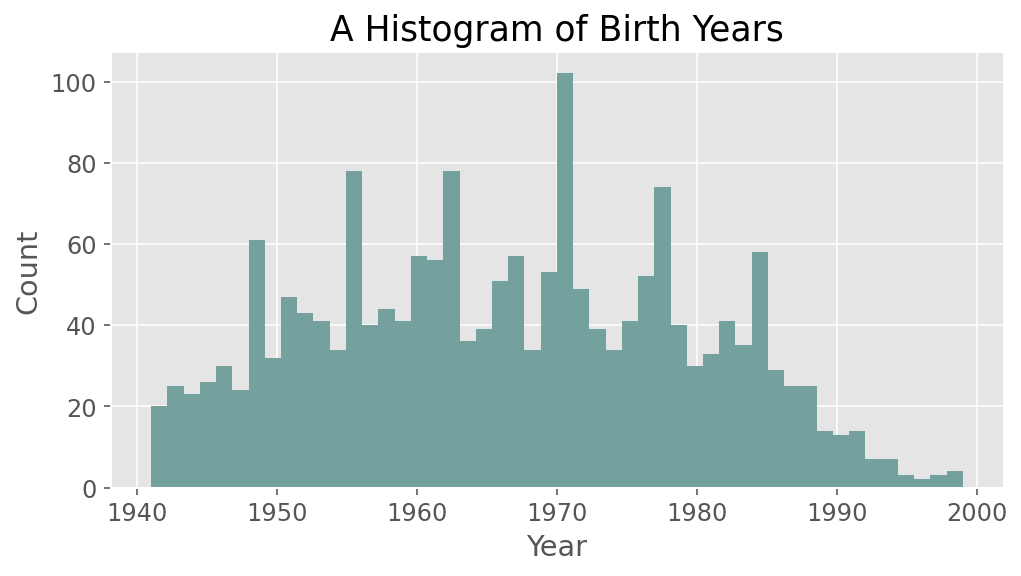

In [17]:
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(cc['YearOfBirth'], bins=50)
# Label
ax.set(title='A Histogram of Birth Years',
       xlabel='Year',
       ylabel='Count')
plt.show();

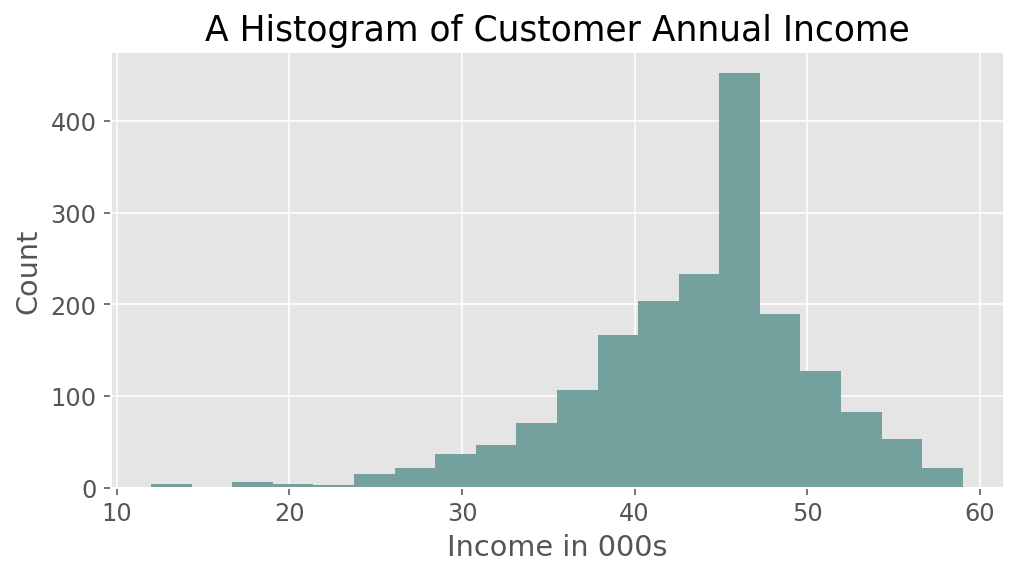

In [18]:
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(cc['AIncome'], bins=20)
# Label
ax.set(title='A Histogram of Customer Annual Income',
       xlabel='Income in 000s',
       ylabel='Count')
plt.show();

Examining the  distribution of different neighborhood groups

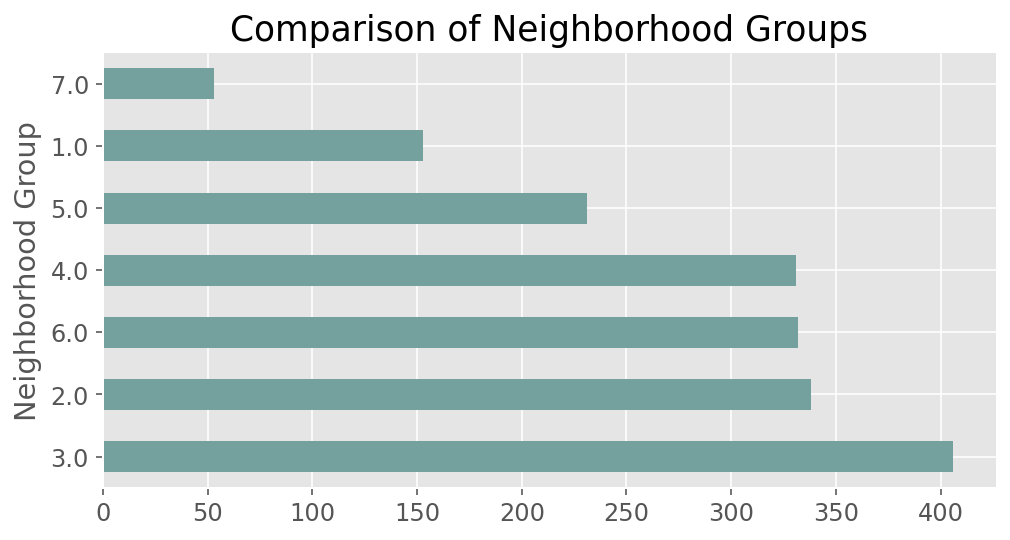

In [19]:
ax = cc.NGroup.value_counts().plot.barh()

ax.set(title='Comparison of Neighborhood Groups',
       ylabel='Neighborhood Group')

plt.show();

Groups 7 and 1 will be merged into 1 group, named 'Other' (numerical 8), as they make up for less than 10% of the distribution

In [20]:
#continue here

Importing the second data set, Transactions

In [21]:
txns = pd.read_spss('Transactions.sav')
txns

,CustID,TranDate,Amount,Web,Store
0,0000075469,2019-05-06 13:32:00,52.82,Yes,No
1,0000075469,2019-05-12 13:43:00,52.17,Yes,No
2,0000075469,2019-11-04 13:43:00,42.63,Yes,No
3,0000075469,2018-01-12 15:37:00,41.79,Yes,No
4,0000075469,2019-12-08 12:37:00,30.94,Yes,No
...,...,...,...,...,...
5815,0052732018,2019-04-05 12:32:00,11.45,Yes,No
5816,0052745187,2019-05-09 12:00:00,204.58,No,Yes
5817,0052745187,2019-05-06 14:06:00,159.83,No,Yes
5818,0052745187,2018-12-12 11:17:00,94.43,Yes,No


This dataset has over 5,000 rows. Indicating that a single customer made multiple transactions

In [22]:
txn, meta = pyreadstat.read_sav('Transactions.sav')
txn

,CustID,TranDate,Amount,Web,Store
0,0000075469,2019-05-06 13:32:00,52.82,1.0,0.0
1,0000075469,2019-05-12 13:43:00,52.17,1.0,0.0
2,0000075469,2019-11-04 13:43:00,42.63,1.0,0.0
3,0000075469,2018-01-12 15:37:00,41.79,1.0,0.0
4,0000075469,2019-12-08 12:37:00,30.94,1.0,0.0
...,...,...,...,...,...
5815,0052732018,2019-04-05 12:32:00,11.45,1.0,0.0
5816,0052745187,2019-05-09 12:00:00,204.58,0.0,1.0
5817,0052745187,2019-05-06 14:06:00,159.83,0.0,1.0
5818,0052745187,2018-12-12 11:17:00,94.43,1.0,0.0


In [23]:
txn.isnull().sum()

CustID      0
TranDate    0
Amount      0
Web         0
Store       0
dtype: int64

In [38]:
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CustID    5820 non-null   object        
 1   TranDate  5820 non-null   datetime64[ns]
 2   Amount    5820 non-null   float64       
 3   Web       5820 non-null   float64       
 4   Store     5820 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 227.5+ KB


In [35]:
with pd.option_context('float_format', '{:f}'.format):
    txn.describe()

,Amount,Web,Store
count,5820.000000,5820.000000,5820.000000
mean,66.054615,0.364777,0.635223
std,168.464304,0.481409,0.481409
min,1.010000,0.000000,0.000000
25%,12.500000,0.000000,0.000000
50%,37.360000,0.000000,1.000000
75%,77.707500,1.000000,1.000000
max,5081.980000,1.000000,1.000000


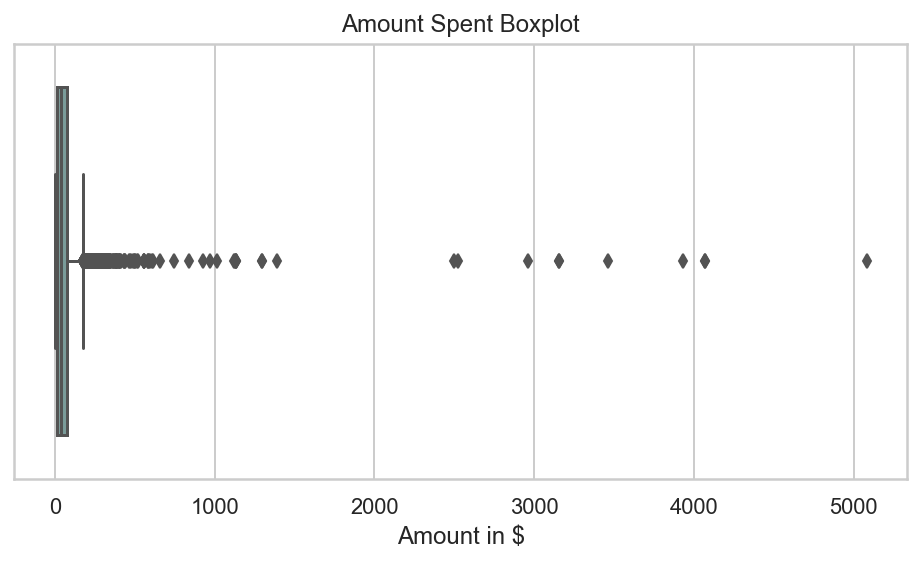

In [34]:
fig, ax = plt.subplots()

# Create a boxplot
sns.boxplot(x = 'Amount', data= txn,
           palette=['#74a09e','#f2a553'])

# Labelling
ax.set(title='Amount Spent Boxplot',
       xlabel='Amount in $')


plt.show();

Some outliers detected, however the common practice is not to impute them. Rather, we acknowledge them and move on.

Next, the two datasets will have to be joined. Process:

    1. The transaction dataset will be grouped into one row per customer with the following columns:
        - ID, LatestTransactionDate, TotalAmountSpent, NoOfWebTxns, NoOfStoreTxns, TotalTxns
    2. Join the two datasets on CustomerId

In [40]:
txn_grpd = txn.groupby(by=["CustID"]).sum()
txn_grpd

,Amount,Web,Store
CustID,,,
0000002771,678.33,4.0,3.0
0000004529,417.95,1.0,2.0
0000011207,33.05,1.0,0.0
0000019763,2.65,0.0,1.0
0000046906,83.75,1.0,0.0
...,...,...,...
0052732018,435.15,2.0,3.0
0052745187,458.84,1.0,2.0
0052758092,885.18,10.0,1.0


In [50]:
txn_grpd["TotalTxn"] = txn_grpd["Web"] + txn_grpd["Store"]


In [47]:
txn_date = txn[['CustID', 'TranDate']]
txn_date = txn_date.groupby(by = ['CustID']).max()
txn_date

,TranDate
CustID,
0000002771,2019-08-11 12:32:00
0000004529,2019-07-10 15:45:00
0000011207,2019-12-09 09:03:00
0000019763,2019-07-07 10:20:00
0000046906,2019-05-10 13:58:00
...,...
0052732018,2019-06-11 11:44:00
0052745187,2019-05-09 12:00:00
0052758092,2019-09-11 15:17:00


In [57]:
txn_full = pd.merge(txn_grpd, txn_date, on = 'CustID')
txn_full.rename(columns = {"TranDate": "LatestTxn", "Amount" : "TotalAmount"}, inplace = True)
txn_full = pd.DataFrame(txn_full)
txn_full


,TotalAmount,Web,Store,TotalTxn,LatestTxn
CustID,,,,,
0000002771,678.33,4.0,3.0,7.0,2019-08-11 12:32:00
0000004529,417.95,1.0,2.0,3.0,2019-07-10 15:45:00
0000011207,33.05,1.0,0.0,1.0,2019-12-09 09:03:00
0000019763,2.65,0.0,1.0,1.0,2019-07-07 10:20:00
0000046906,83.75,1.0,0.0,1.0,2019-05-10 13:58:00
...,...,...,...,...,...
0052732018,435.15,2.0,3.0,5.0,2019-06-11 11:44:00
0052745187,458.84,1.0,2.0,3.0,2019-05-09 12:00:00
0052758092,885.18,10.0,1.0,11.0,2019-09-11 15:17:00


In [58]:
df = pd.merge(cc, txn_full, on = 'CustID')
df

,CustID,LDate,YearOfBirth,Gender,CallCenter,NGroup,Region,Class,AIncome,Response,TotalAmount,Web,Store,TotalTxn,LatestTxn
0,0000002771,2015-11-07,1949.0,3.0,0.0,4.0,2.0,1.0,43.0,0.0,678.33,4.0,3.0,7.0,2019-08-11 12:32:00
1,0000004529,2015-06-29,1959.0,2.0,0.0,6.0,1.0,3.0,41.0,0.0,417.95,1.0,2.0,3.0,2019-07-10 15:45:00
2,0000011207,2017-05-23,1966.0,2.0,0.0,4.0,1.0,3.0,45.0,0.0,33.05,1.0,0.0,1.0,2019-12-09 09:03:00
3,0000019763,2016-11-19,1946.0,1.0,0.0,2.0,1.0,2.0,43.0,0.0,2.65,0.0,1.0,1.0,2019-07-07 10:20:00
4,0000046906,2017-11-12,1976.0,1.0,1.0,6.0,2.0,3.0,47.0,0.0,83.75,1.0,0.0,1.0,2019-05-10 13:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,0052732018,2013-09-01,1979.0,1.0,0.0,5.0,1.0,3.0,55.0,0.0,435.15,2.0,3.0,5.0,2019-06-11 11:44:00
1840,0052745187,2016-12-02,1973.0,1.0,0.0,6.0,1.0,2.0,36.0,0.0,458.84,1.0,2.0,3.0,2019-05-09 12:00:00
1841,0052758092,2016-04-02,1958.0,1.0,0.0,1.0,4.0,3.0,43.0,1.0,885.18,10.0,1.0,11.0,2019-09-11 15:17:00
1842,0052780250,2011-01-29,1980.0,2.0,0.0,6.0,2.0,3.0,38.0,0.0,163.36,0.0,1.0,1.0,2019-06-12 09:56:00
